# Loading the Custom-NER Model

In [ ]:
!unzip IdentifyingModulesandGrades.zip

Archive:  IdentifyingModulesandGrades.zip
  inflating: IdentifyingModulesandGrades/config.cfg  
  inflating: IdentifyingModulesandGrades/meta.json  
   creating: IdentifyingModulesandGrades/ner/
  inflating: IdentifyingModulesandGrades/ner/cfg  
  inflating: IdentifyingModulesandGrades/ner/model  
  inflating: IdentifyingModulesandGrades/ner/moves  
  inflating: IdentifyingModulesandGrades/tokenizer  
   creating: IdentifyingModulesandGrades/vocab/
 extracting: IdentifyingModulesandGrades/vocab/key2row  
 extracting: IdentifyingModulesandGrades/vocab/lookups.bin  
  inflating: IdentifyingModulesandGrades/vocab/strings.json  
  inflating: IdentifyingModulesandGrades/vocab/vectors  
 extracting: IdentifyingModulesandGrades/vocab/vectors.cfg  


# Installig pytesseract and poppler libraries

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


# Importing necessary Libraries

In [ ]:
import spacy
import random
import pandas as pd
from spacy.util import minibatch, compounding
from spacy.training.example import Example
from spacy import displacy
from spacy.tokens import DocBin
from tqdm import tqdm
import glob
import pytesseract
from pdf2image import convert_from_path
import re
import csv

# Importing the libraries to train the model

In [ ]:
try:
    import json
    import os
    
    import pandas as  pd
    import spacy
    
    import seaborn as sns
    import string

    from tqdm import tqdm
    from textblob import TextBlob
    
    from nltk.corpus import stopwords
    import nltk
    from nltk.stem import WordNetLemmatizer
    from nltk import word_tokenize
    import re
    
    
    from sklearn.preprocessing import LabelEncoder
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.pipeline import Pipeline
    
    import matplotlib.pyplot as plt
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
    from sklearn import svm
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
    import seaborn as sns
    from imblearn.over_sampling import SMOTE
    
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.base import BaseEstimator, TransformerMixin
    from sklearn.pipeline import FeatureUnion
    from sklearn.feature_extraction import DictVectorizer
    
    import swifter
    
    tqdm.pandas()
except Exception as e:
    print("Error : {} ".format(e))

Error : No module named 'swifter' 


# Downloading the nltk library

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Loading the dataset

In [ ]:
df = pd.read_csv("Categorising Modules for prediction.csv")
df.head(5)

,Skill Area,Module Title,Module Keywords
0,Programming and Software Development,Secure Coding in Perl,"Perl programming language, Secure coding pract..."
1,Data Analysis and Visualization,Data Visualization for Project Management,"Data visualization, Project management, Visual..."
2,Database Management,Database Capacity Planning and Forecasting,"Database capacity planning, Database forecasti..."
3,Programming and Software Development,Secure Coding in PHP,"Secure coding, PHP programming, Web applicatio..."
4,Database Management,Database Audit and Compliance Procedures,"Database audit, Compliance procedures, Data go..."


# Visualising the dataset

In [ ]:
df.groupby('Skill Area').describe()

Module Title         \
                                                          count unique   
Skill Area                                                               
Artificial Intelligence, Machine Learning and D...          672    587   
Cloud Computing                                             766    594   
Cybersecurity                                               871    753   
Data Analysis and Visualization                             695    609   
Database Management                                        1000    486   
IT Infrastructure and Networking                            858    621   
Programming and Software Development                        728    500   
Project Management                                          750    589   
System Administration                                       936    568   
User Experience and Design                                  499    362   

                                                                                                       \
                                                                                                  top   
Skill Area                                                                                              
Artificial Intelligence, Machine Learning and D...                        Deep Reinforcement Learning   
Cloud Computing                                             Cloud Data Extraction and Loading Methods   
Cybersecurity                                         Incident Response Plan Documentation and Review   
Data Analysis and Visualization                            Data Visualization with Sentiment Analysis   
Database Management                                           Database Backup and Recovery Strategies   
IT Infrastructure and Networking                                Network Service Deployment Management   
Programming and Software Development                  Cloud Serverless Computing with Azure Functions   
Project Management                                  Project Integration Management Techniques and ...   
System Administration                               Network Load Balancer Configuration and Troubl...   
User Experience and Design                                   Designing for Art and Creative Platforms   

                                                        Module Keywords  \
                                                   freq           count   
Skill Area                                                                
Artificial Intelligence, Machine Learning and D...    4             672   
Cloud Computing                                      10             766   
Cybersecurity                                         4             871   
Data Analysis and Visualization                       4             695   
Database Management                                  18            1000   
IT Infrastructure and Networking                      8             858   
Programming and Software Development                  4             728   
Project Management                                    5             750   
System Administration                                 8             936   
User Experience and Design                            7             499   

                                                           \
                                                   unique   
Skill Area                                                  
Artificial Intelligence, Machine Learning and D...    590   
Cloud Computing                                       599   
Cybersecurity                                         758   
Data Analysis and Visualization                       615   
Database Management                                   501   
IT Infrastructure and Networking                      625   
Programming and Software Development                  511   
Project Management                                    599   
System Administration                                 579   
User Experienc

# Visualising the count of the dataset

<Axes: >

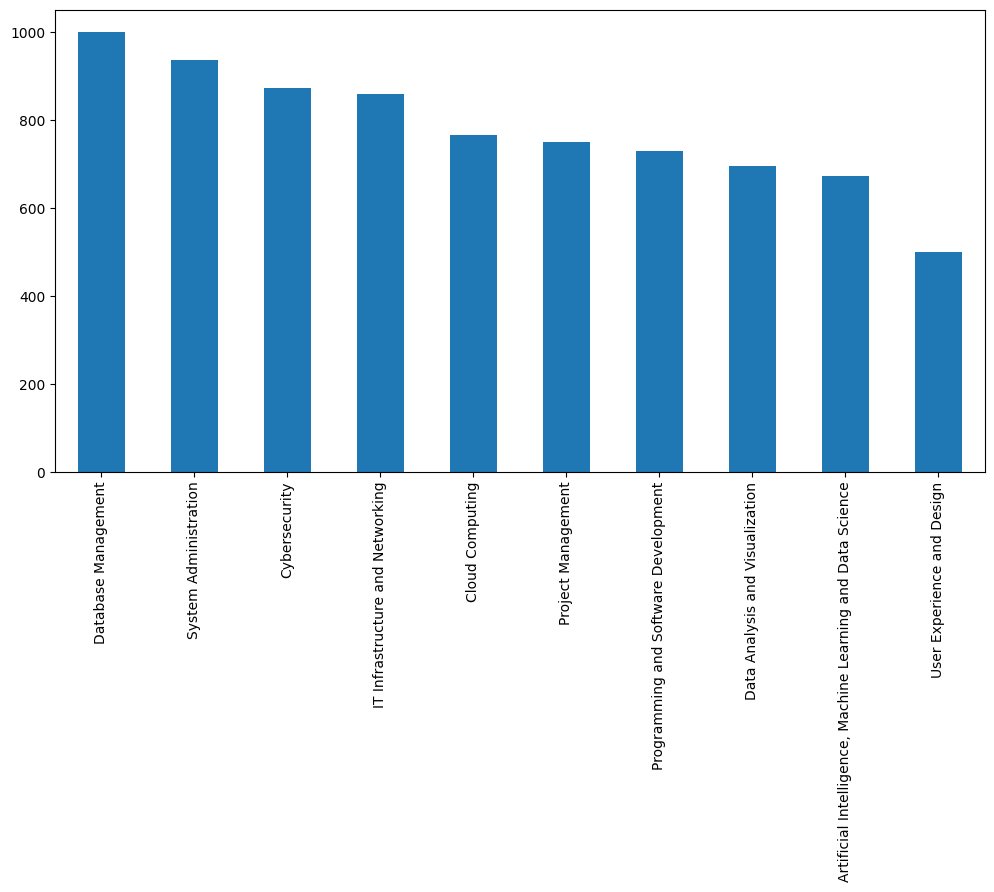

In [ ]:
df['Skill Area'].value_counts().plot( kind='bar', figsize=(12,6))

# Exploring the dataset

In [ ]:
#Explore the data types of the columns
df.dtypes

Skill Area         object
Module Title       object
Module Keywords    object
dtype: object

In [ ]:
#Checking for null values
df.isnull().sum()

Skill Area         0
Module Title       0
Module Keywords    0
dtype: int64

In [ ]:
df.shape

(7775, 3)

In [ ]:
print(df['Module Title'].apply(lambda x: len(x.split(' '))).sum())
print(df['Module Keywords'].apply(lambda x: len(x.split(' '))).sum())

39346
40366


# Preprocessing the dataset

In [ ]:
nltk.download('stopwords')

special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['Module Title'] = df['Module Title'].apply(clean_text)
df['Module Keywords'] = df['Module Keywords'].apply(clean_text)

In [ ]:
print(df['Module Title'].apply(lambda x: len(x.split(' '))).sum())
print(df['Module Keywords'].apply(lambda x: len(x.split(' '))).sum())

33144
34275


# Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
x = df['Module Title'].str.lower() + ' ' + df['Module Keywords'].str.lower()
y = df['Skill Area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

## Installing additional libraries

In [ ]:
!pip install transformers

# Applying the Logistic Regression algorithm to train the model

In [ ]:
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Train Word2Vec model
sentences = [text.split() for text in x_train]
word2vec_model = gensim.models.Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Create document vectors using Word2Vec
document_vectors = []
for text in sentences:
    vectors = [word2vec_model.wv[word] for word in text if word in word2vec_model.wv]
    if vectors:
        document_vectors.append(sum(vectors) / len(vectors))
    else:
        document_vectors.append([0] * 100)

import numpy as np

# Create document vectors using Word2Vec
document_vectors = [np.mean([word2vec_model.wv[word] for word in sentence], axis=0) for sentence in sentences]

# Convert document vectors to numpy array
X_train = np.array(document_vectors)

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Split into training and testing data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=42)

# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train, y_train_encoded)

# Predict and evaluate
X_test_vectors = []
for text in x_test:
    vectors = [word2vec_model.wv[word] for word in text.split() if word in word2vec_model.wv]
    if vectors:
        X_test_vectors.append(sum(vectors) / len(vectors))
    else:
        X_test_vectors.append([0] * 100)
X_test_vectors = np.array(X_test_vectors)

y_pred_encoded = classifier.predict(X_test_vectors)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy:.4f}')

# Applying the Naive Bayes algorithm to train the model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create the pipeline
naivebayes = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

# Fit the pipeline
naivebayes.fit(x_train, y_train_encoded)

# Predict and evaluate
y_pred_encoded = naivebayes.predict(x_test)

# Decode predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7980707395498392


# Applying the XGBoost Algorithm to train the model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score

# Encode class labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

xgboost = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', XGBClassifier())
])

xgboost.fit(x_train, y_train_encoded)

y_pred_encoded = xgboost.predict(x_test)

# Decode predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 0.862379421221865


# Applying the Random Forest Algorithm to train the model

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Preprocess the data
nltk.download('stopwords')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('[/(){}\[\]\|@,;]', ' ', text)
    text = re.sub('[^0-9a-z #+_]', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text

df['Module Title'] = df['Module Title'].apply(clean_text)
df['Module Keywords'] = df['Module Keywords'].apply(clean_text)

# Split the dataset into training and testing
x = df['Module Title'].str.lower() + ' ' + df['Module Keywords'].str.lower()
y = df['Skill Area']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize CountVectorizer
countvect = CountVectorizer()

# Prepare the feature matrix
x_train_encoded = countvect.fit_transform(x_train.tolist())
x_test_encoded = countvect.transform(x_test.tolist())

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_train_encoded, y_train_encoded)

# Predict on the test set
y_pred_encoded = random_forest.predict(x_test_encoded)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Evaluate the model
accuracy = accuracy_score(y_pred, y_test)
print(f'Accuracy: {accuracy}')


# Vectorizing the train columns using Countvectorizer

In [ ]:
countvect = CountVectorizer()
x_train = countvect.fit_transform(x_train)
x_test = countvect.transform(x_test)

In [ ]:
X_train = pd.DataFrame(x_train)
x_resample, y_resample = SMOTE().fit_resample(x_train, y_train)

# Applying the Support Vector Machine(SVM) Algorithm to train the model

In [ ]:
svm_model = SVC(kernel='rbf', random_state = 0)
svm_model.fit(x_resample,y_resample)

SVC(random_state=0)

In [ ]:
#svm_model.score(x_test, y_test)
prediction = svm_model.predict(x_test)
accuracy_score(y_test,prediction)

0.8745980707395499

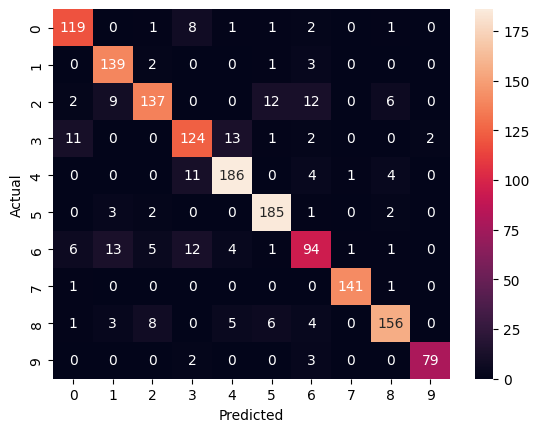

In [ ]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(y_test,prediction))

                                                            precision    recall  f1-score   support

Artificial Intelligence, Machine Learning and Data Science       0.85      0.89      0.87       133
                                           Cloud Computing       0.83      0.96      0.89       145
                                             Cybersecurity       0.88      0.77      0.82       178
                           Data Analysis and Visualization       0.79      0.81      0.80       153
                                       Database Management       0.89      0.90      0.90       206
                          IT Infrastructure and Networking       0.89      0.96      0.93       193
                      Programming and Software Development       0.75      0.69      0.72       137
                                        Project Management       0.99      0.99      0.99       143
                                     System Administration       0.91      0.85      0.88       183

# Saving the model

In [ ]:
import pickle

# Assuming you have a trained model object named 'model'
# Save the model to a file
with open('trained_model1.pkl', 'wb') as file:
    pickle.dump(svm_model, file)


# Loading the model

In [ ]:
import joblib

# Load the trained model from file
classification_model = joblib.load("trained_model1.pkl")


## Load the blank English language model in spaCy

In [ ]:
# Load the blank English language model in spaCy
nlp = spacy.blank("en")

In [ ]:
# Create a new entity type for your custom NER
ner = nlp.create_pipe("ner")
nlp.add_pipe('ner')


In [ ]:
# Disable other pipeline components to focus on NER
pipe_exceptions = ["ner"]
unaffected_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Extracting the text from an Academic Transcript

In [ ]:
# List all PDF files in the directory
pdf_paths = glob.glob(r"Tharindu.pdf")

# Specify the path and name of the text file
text_file_path = "all_extracted_data.txt"

# Open the text file in append mode
with open(text_file_path, "a") as text_file:
    for pdf_path in pdf_paths:
        pages = convert_from_path(pdf_path, 500)

        for pageNum, imBlob in enumerate(pages):
            text = pytesseract.image_to_string(imBlob, lang='eng')

            # Write the extracted text to the file
            text_file.write(text)

# Read the contents of the text file
with open('all_extracted_data.txt', 'r') as file:
    transcript = file.read()


# Preprocessing and extracting the Necessary sections

In [ ]:

# Read the contents of the text file
with open('all_extracted_data.txt', 'r') as file:
    transcript = file.read()

# Adjusted regular expressions with optional whitespace
#year1_section = re.search(r'YEAR\s*1\n([\s\S]+?)\nYear\s*1\s*Credits=', transcript, re.IGNORECASE).group(1)
#year2_section = re.search(r'YEAR\s*2\n([\s\S]+?)\nYear\s*2\s*Credits=', transcript, re.IGNORECASE).group(1)
#year3_section = re.search(r'YEAR\s*3\n([\s\S]+?)\nYear\s*3\s*Credits=', transcript, re.IGNORECASE).group(1)
#year4_section = re.search(r'YEAR\s*4\n([\s\S]+?)\nYear\s*4\s*Credits=', transcript, re.IGNORECASE).group(1)

#sections = [year1_section, year2_section, year3_section, year4_section]

# Define the pattern to extract the sections
pattern = r'YEAR (\d+)\n([\s\S]+?)\nYear \1 Credits='

# Find all the sections using the pattern
matches = re.findall(pattern, transcript)

# Create a list of sections
sections = [match[1] for match in matches]

# Save sections to a text file
output_text_file_path = "extracted_sections.txt"
with open(output_text_file_path, "w") as output_text_file:
    for section in sections:
        output_text_file.write(section + "\n\n")

# Print a message indicating the successful save
print("Extracted sections saved to", output_text_file_path)

Extracted sections saved to extracted_sections.txt


# Load the trained NER model from disk

In [ ]:
# Load the trained NER model from disk
nlp_ner = spacy.load('IdentifyingModulesandGrades')

/usr/local/lib/python3.10/dist-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# Applying the custom NER model to identify Module Titles and the Grades

In [ ]:
# Load the document from the text file
with open("extracted_sections.txt", "r") as file:
    text = file.read()

# Process the document with the custom NER model
doc = nlp_ner(text)

# Extract and print the entities
print("Entities:")
for ent in doc.ents:
    print(ent.text, ent.label_)

Entities:
Module Title

Software Engineering
Object Oriented Programming
_ Database Management Systems
| Networks
Systems and System Administration

 
vi Applications and Frameworks
roject Management
Employability Skills Development - Seminar
Human Computer Interaction Oct - 2021
Oct - MODULE_TITLE
2021
Oct - MODULE_TITLE
2021
Oct - MODULE_TITLE
2021

Oct - MODULE_TITLE
2021

Information Assurance & Security
Data Science & Analytics
Business Management for IT

mmoNYMN NY NY NY S| S| Se os oS

Industry Placement

Year 3 Credits=30.00 Year 3 Grade Points=88.80

 MODULE_TITLE
1T3050* CODE
& IT3110* MODULE_TITLE
- Non GPA Modules
STATUS : Completed YEAR 3

Module Title Semester

Machine Learning se Dec é MODULE_TITLE
2022

Modern Topics in IT Jun - MODULE_TITLE
2022
Preparation for the Professional World Jun - MODULE_TITLE
2022
Research Project Nov - MODULE_TITLE
2022
Cloud Computing Nov - MODULE_TITLE
2022

Knowledge Management Nov - MODULE_TITLE
2022

Year 4 Grade Points=94.80

STATUS :

# Getting the Module Titles and the Grades to a seperate CSV File

In [ ]:
import pandas as pd

def test_ner_model(file_path, output_file):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    modules = []
    grades = []

    print("Testing NER on file:", file_path)
    print("Entities:")
    for line in lines:
        doc = nlp_ner(line.strip())
        module_title = None
        grade = None
        for ent in doc.ents:
            if ent.label_ == "MODULE_TITLE":
                module_title = ent.text
            elif ent.label_ == "GRADE":
                grade = ent.text

        if module_title and grade:  # Only append if both module title and grade exist
            modules.append(module_title)
            grades.append(grade)

    # Create a DataFrame with modules and grades
    data = {"Module Title": modules, "Grade": grades}
    df = pd.DataFrame(data)

    # Save the DataFrame to a CSV file
    df.to_csv(output_file, index=False)
    print("Saved extracted data to", output_file)

# Provide the file path to test and output file path
file_path = "extracted_sections.txt"
output_file = "extracted_data.csv"
test_ner_model(file_path, output_file)


Testing NER on file: extracted_sections.txt
Entities:
Saved extracted data to extracted_data.csv


# Categorsing the Module Titles and Module Keywords into Skill Areas

In [ ]:
import pandas as pd

# Read the extracted data CSV file
extracted_data_df = pd.read_csv("extracted_data.csv")

# Preprocess the module titles in the extracted data
extracted_data_df['Module Title'] = extracted_data_df['Module Title'].apply(clean_text)

# Read the module outline CSV file
module_outline_df = pd.read_csv("Module Keywords.csv")

# Preprocess the module titles in the module outline
module_outline_df['Module Title'] = module_outline_df['Module Title'].apply(clean_text)

# Vectorize the module titles using CountVectorizer
module_title_vectors_extracted = countvect.transform(extracted_data_df['Module Title'])
module_title_vectors_outline = countvect.transform(module_outline_df['Module Title'])

# Predict the categories for the module titles in the extracted data using the trained classification model
predicted_categories = classification_model.predict(module_title_vectors_extracted)

# Map the module titles from the extracted data to the module titles in the module outline
extracted_data_df['Category'] = predicted_categories
merged_df = extracted_data_df.merge(module_outline_df, on='Module Title', how='left')

# Define the grade weighting dictionary
grade_weighting = {
    'A+': 10,
    'A': 9,
    'A-': 8,
    'B+': 7,
    'B': 6,
    'B-': 5,
    'C+': 4,
    'C': 3,
    'C-': 2,
    'D+': 1,
    'D': 1,
    'E': 1
}

# Calculate the weighted grades based on the grade weighting dictionary
merged_df['Weighted Grade'] = merged_df['Grade'].map(grade_weighting)

# Create a table with the skill areas, module titles, module descriptions, and weighted grades
skill_area_table = merged_df[['Category', 'Module Title', 'Module Keywords', 'Weighted Grade']]

# Replace '\n' with line breaks in module keywords
skill_area_table['Module Keywords'] = skill_area_table['Module Keywords'].str.replace(r'\n', ',')


#Exclude module titles not present in the module outline CSV file
skill_area_table = skill_area_table.dropna(subset=['Module Keywords'])

# Display the skill area table
skill_area_table.head(20)


<ipython-input-115-66c063b19390>:49: FutureWarning: The default value of regex will change from True to False in a future version.
  skill_area_table['Module Keywords'] = skill_area_table['Module Keywords'].str.replace(r'\n', ',')
<ipython-input-115-66c063b19390>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  skill_area_table['Module Keywords'] = skill_area_table['Module Keywords'].str.replace(r'\n', ',')


,Category,Module Title,Module Keywords,Weighted Grade
0,Programming and Software Development,introduction programming,"data types, control structures, functions, poi...",9.0
1,"Artificial Intelligence, Machine Learning and ...",introduction computer systems,"computer systems, computer organization, combi...",4.0
2,"Artificial Intelligence, Machine Learning and ...",mathematics computing,"Logic Control, Number Systems, Differentiation...",6.0
4,Programming and Software Development,object oriented concepts,"Object Oriented Programming, design solutions,...",9.0
5,Programming and Software Development,software process modeling,"Software Engineering, requirement specificatio...",9.0
9,Programming and Software Development,software engineering,"Object-oriented, Design pattern, Software test...",9.0
11,Database Management,database management systems,"Database design, Hands-on experience, Schema r...",9.0
12,"Artificial Intelligence, Machine Learning and ...",computer networks,"Configuration TCP, TCP/IP operation, Switching...",9.0
13,System Administration,operating systems system administration,"System administration, Lecture tutorial lab, K...",7.0
15,Programming and Software Development,data structures algorithms,"Data structures,Stacks,Queues,Linked lists,Tre...",9.0


# Calcuating the weight of each category and displaying it

Category
Programming and Software Development                          186.0
Artificial Intelligence, Machine Learning and Data Science    132.0
Data Analysis and Visualization                                42.0
Database Management                                            34.0
Project Management                                             32.0
User Experience and Design                                     16.0
System Administration                                          14.0
Name: Weighted Grade, dtype: float64


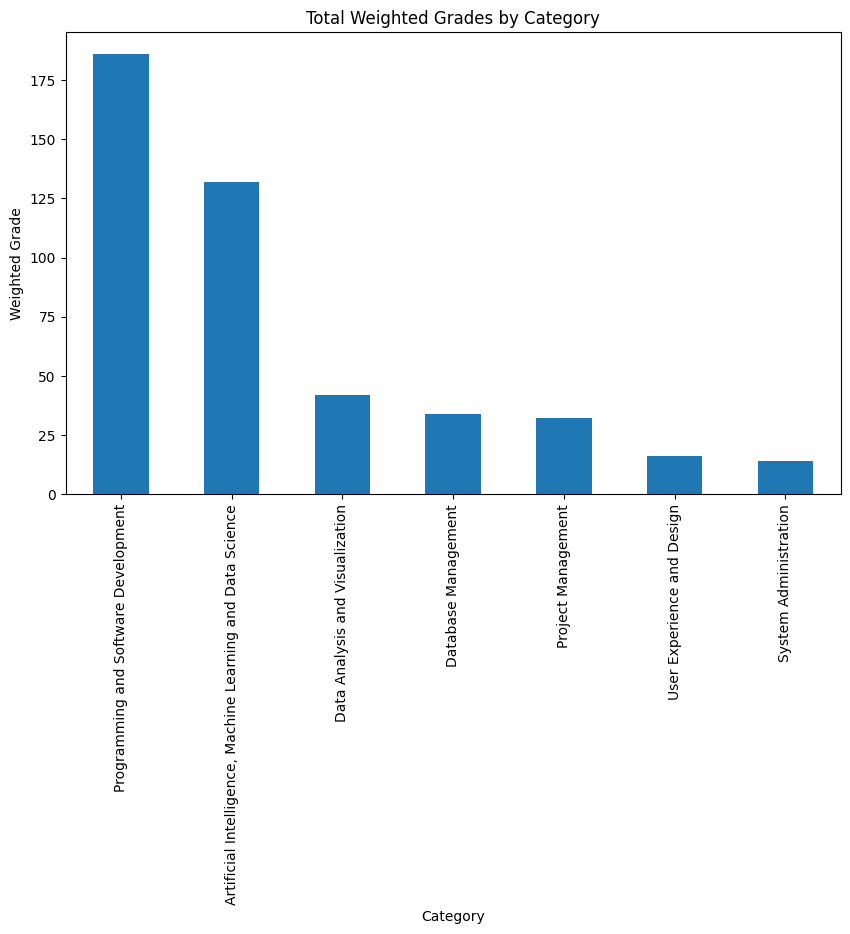

In [ ]:
# Group the skill area table by the 'Category' column and calculate the sum of the 'Weighted Grade' column for each category
category_totals = merged_df.groupby('Category')['Weighted Grade'].sum()

# Sort the categories by their total weighted grades in descending order
category_totals = category_totals.sort_values(ascending=False)

# Display the category totals table
print(category_totals)

# Exclude 'Core Competencies' category from category_totals
category_totals = category_totals[category_totals.index != 'core competencies and soft skills']

# Plot the bar graph of weighted grades in each category
plt.figure(figsize=(10, 6))
category_totals.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Weighted Grade')
plt.title('Total Weighted Grades by Category')

plt.show()

# Displaying the skill areas using a pie chart

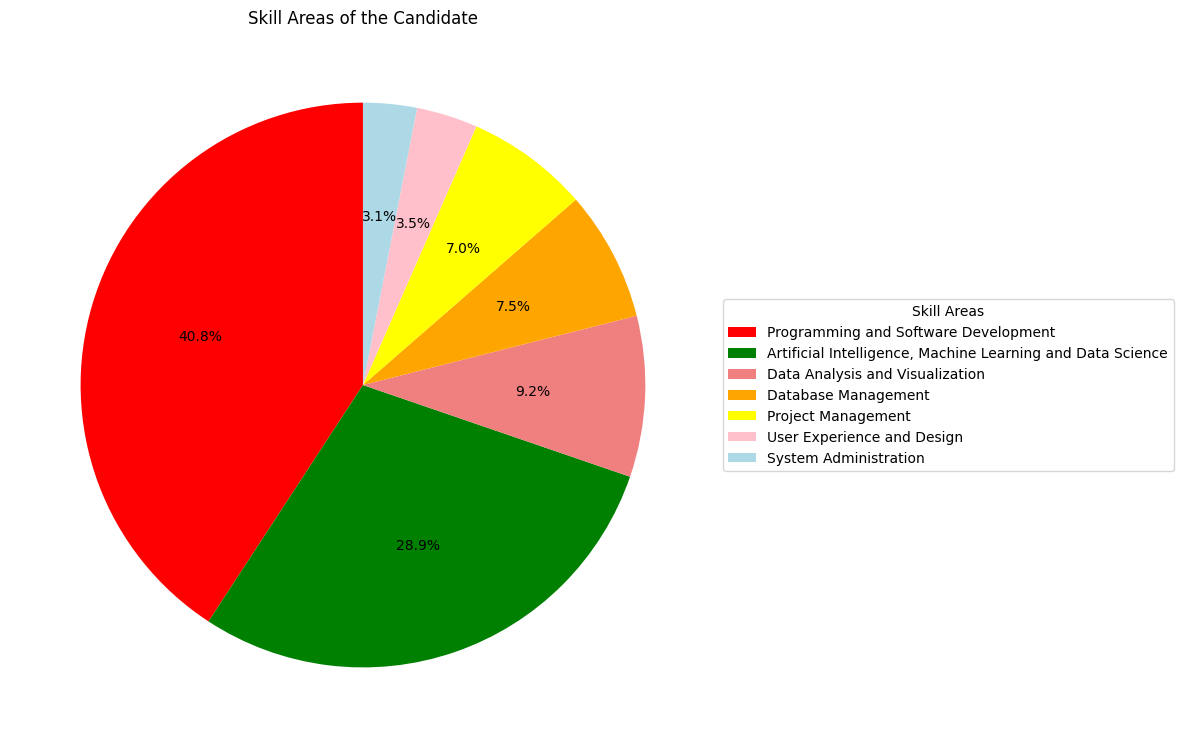

In [ ]:
import matplotlib.pyplot as plt

# Generate the pie chart
plt.figure(figsize=(14, 14))
plt.pie(category_totals, labels=None, autopct='%1.1f%%', startangle=90)

# Set colors for each category
colors = ['red', 'green', 'lightcoral', 'orange', 'yellow', 'pink', 'lightblue', 'gray', 'lavender', 'salmon']

# Customize colors for each pie slice
for i, wedge in enumerate(plt.gca().patches):
    wedge.set_facecolor(colors[i % len(colors)])

# Add a legend with categories and colors
legend_labels = category_totals.index
legend_colors = colors[:len(legend_labels)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Skill Areas', labelcolor='black')

# Add a title
plt.title('Skill Areas of the Candidate')

# Adjust layout to make room for the legend
plt.tight_layout(rect=(0, 0, 0.85, 1))

plt.show()



# Displaying the Skill Areas using a Radar Graph

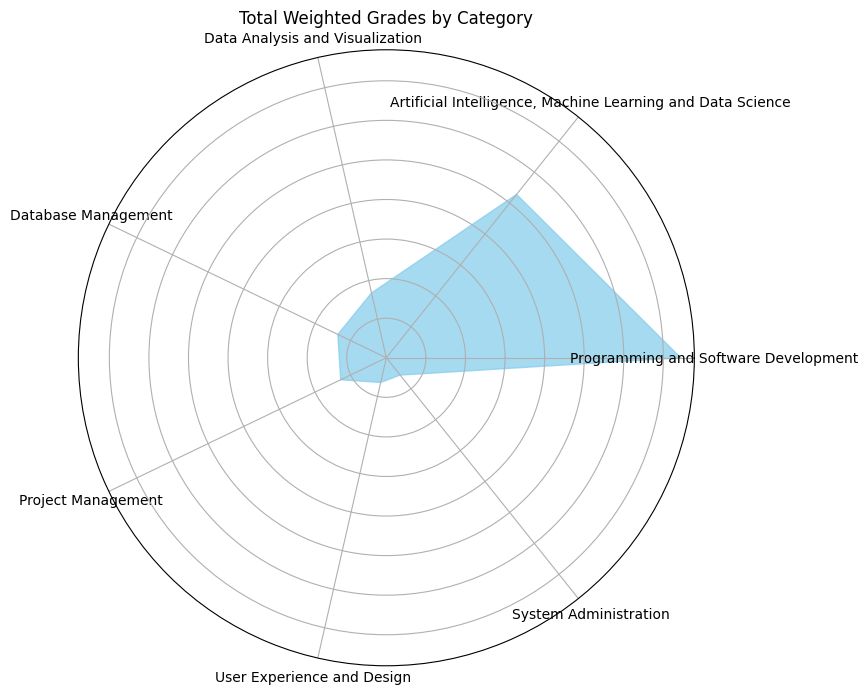

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the number of categories and angles
num_categories = len(category_totals)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

# Get the weighted grades and category names
grades = category_totals.values
category_names = category_totals.index

# Plot the radar graph
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.fill(angles, grades, color='skyblue', alpha=0.75)
ax.set_xticks(angles)
ax.set_xticklabels(category_names)
ax.set_yticklabels([])
ax.set_title('Total Weighted Grades by Category')

plt.show()
